In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_BRCpofr.csv")

In [3]:
df.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,89392.0,44696.500000,25805.391969,1.0,22348.75,44696.5,67044.25,89392.0
marital_status,89392.0,0.575488,0.494272,0.0,0.00,1.0,1.00,1.0
vintage,89392.0,4.595669,2.290446,0.0,3.00,5.0,6.00,8.0
claim_amount,89392.0,4351.502416,3262.359775,0.0,2406.00,4089.0,6094.00,31894.0
cltv,89392.0,97952.828978,90613.814793,24828.0,52836.00,66396.0,103440.00,724068.0


In [6]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [7]:
for i in df.select_dtypes(exclude='number'):
    print(i)
    print(df[i].unique())

gender
['Male' 'Female']
area
['Urban' 'Rural']
qualification
['Bachelor' 'High School' 'Others']
income
['5L-10L' 'More than 10L' '2L-5L' '<=2L']
num_policies
['More than 1' '1']
policy
['A' 'C' 'B']
type_of_policy
['Platinum' 'Gold' 'Silver']


In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title="CLTV of a customer")

In [10]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile.to_file("CLTV_customer.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [13]:
df.duplicated().unique()

array([False])

In [14]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print(" Dataset has '{unique_values}' unique '{column_name}'".format(column_name = column_name,unique_values=unique_values))

 Dataset has '89392' unique 'id'
 Dataset has '2' unique 'gender'
 Dataset has '2' unique 'area'
 Dataset has '3' unique 'qualification'
 Dataset has '4' unique 'income'
 Dataset has '2' unique 'marital_status'
 Dataset has '9' unique 'vintage'
 Dataset has '10889' unique 'claim_amount'
 Dataset has '2' unique 'num_policies'
 Dataset has '3' unique 'policy'
 Dataset has '3' unique 'type_of_policy'
 Dataset has '18796' unique 'cltv'


In [15]:
df.groupby(['gender']).mean()['cltv']

gender
Female    98088.878056
Male      97848.038022
Name: cltv, dtype: float64

In [16]:
df.groupby(['marital_status']).mean()['cltv']

marital_status
0    106155.045536
1     91902.410777
Name: cltv, dtype: float64

In [17]:
df.groupby(['qualification']).mean()['cltv']

qualification
Bachelor       98515.392675
High School    99119.447575
Others         77633.272824
Name: cltv, dtype: float64

In [18]:
df.groupby(['income']).mean()['cltv']

income
2L-5L            109467.408073
5L-10L            95061.906670
<=2L             111444.135922
More than 10L     89445.767564
Name: cltv, dtype: float64

In [19]:
df.groupby(['vintage']).mean()['cltv']

vintage
0     86972.701563
1     92467.931169
2     99822.983961
3    104415.658433
4     98144.888549
5     96148.577518
6     97614.337329
7     98412.723940
8    103711.822665
Name: cltv, dtype: float64

In [20]:
df.groupby(['income','vintage']).mean()['cltv']

income         vintage
2L-5L          0          101680.304668
               1          103888.209231
               2          111678.189647
               3          117192.834532
               4          110229.657938
               5          107846.528658
               6          107507.522160
               7          109881.701733
               8          113964.902864
5L-10L         0           84158.307877
               1           89012.880866
               2           96941.022036
               3          101800.511213
               4           95726.833927
               5           93093.020870
               6           94763.743423
               7           95337.076862
               8          101313.106327
<=2L           0          126095.400000
               1          104253.446809
               2          106728.444444
               3          107797.925926
               4          114634.695652
               5          105833.714286
               6 

<AxesSubplot:xlabel='cltv'>

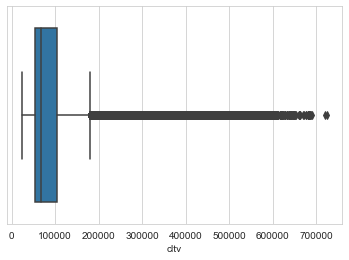

In [21]:
sns.set_style("whitegrid")
sns.boxplot(x =df['cltv'])

<AxesSubplot:xlabel='claim_amount'>

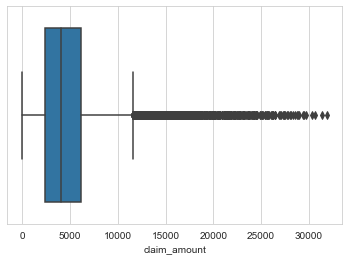

In [22]:
sns.set_style("whitegrid")
sns.boxplot(x =df['claim_amount'])

<AxesSubplot:xlabel='claim_amount', ylabel='Density'>

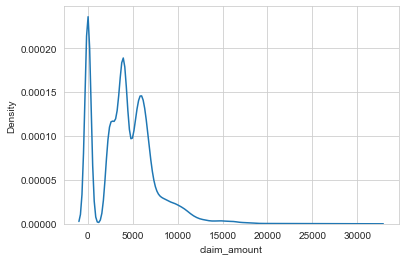

In [23]:
sns.kdeplot(df['claim_amount'])

In [24]:
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


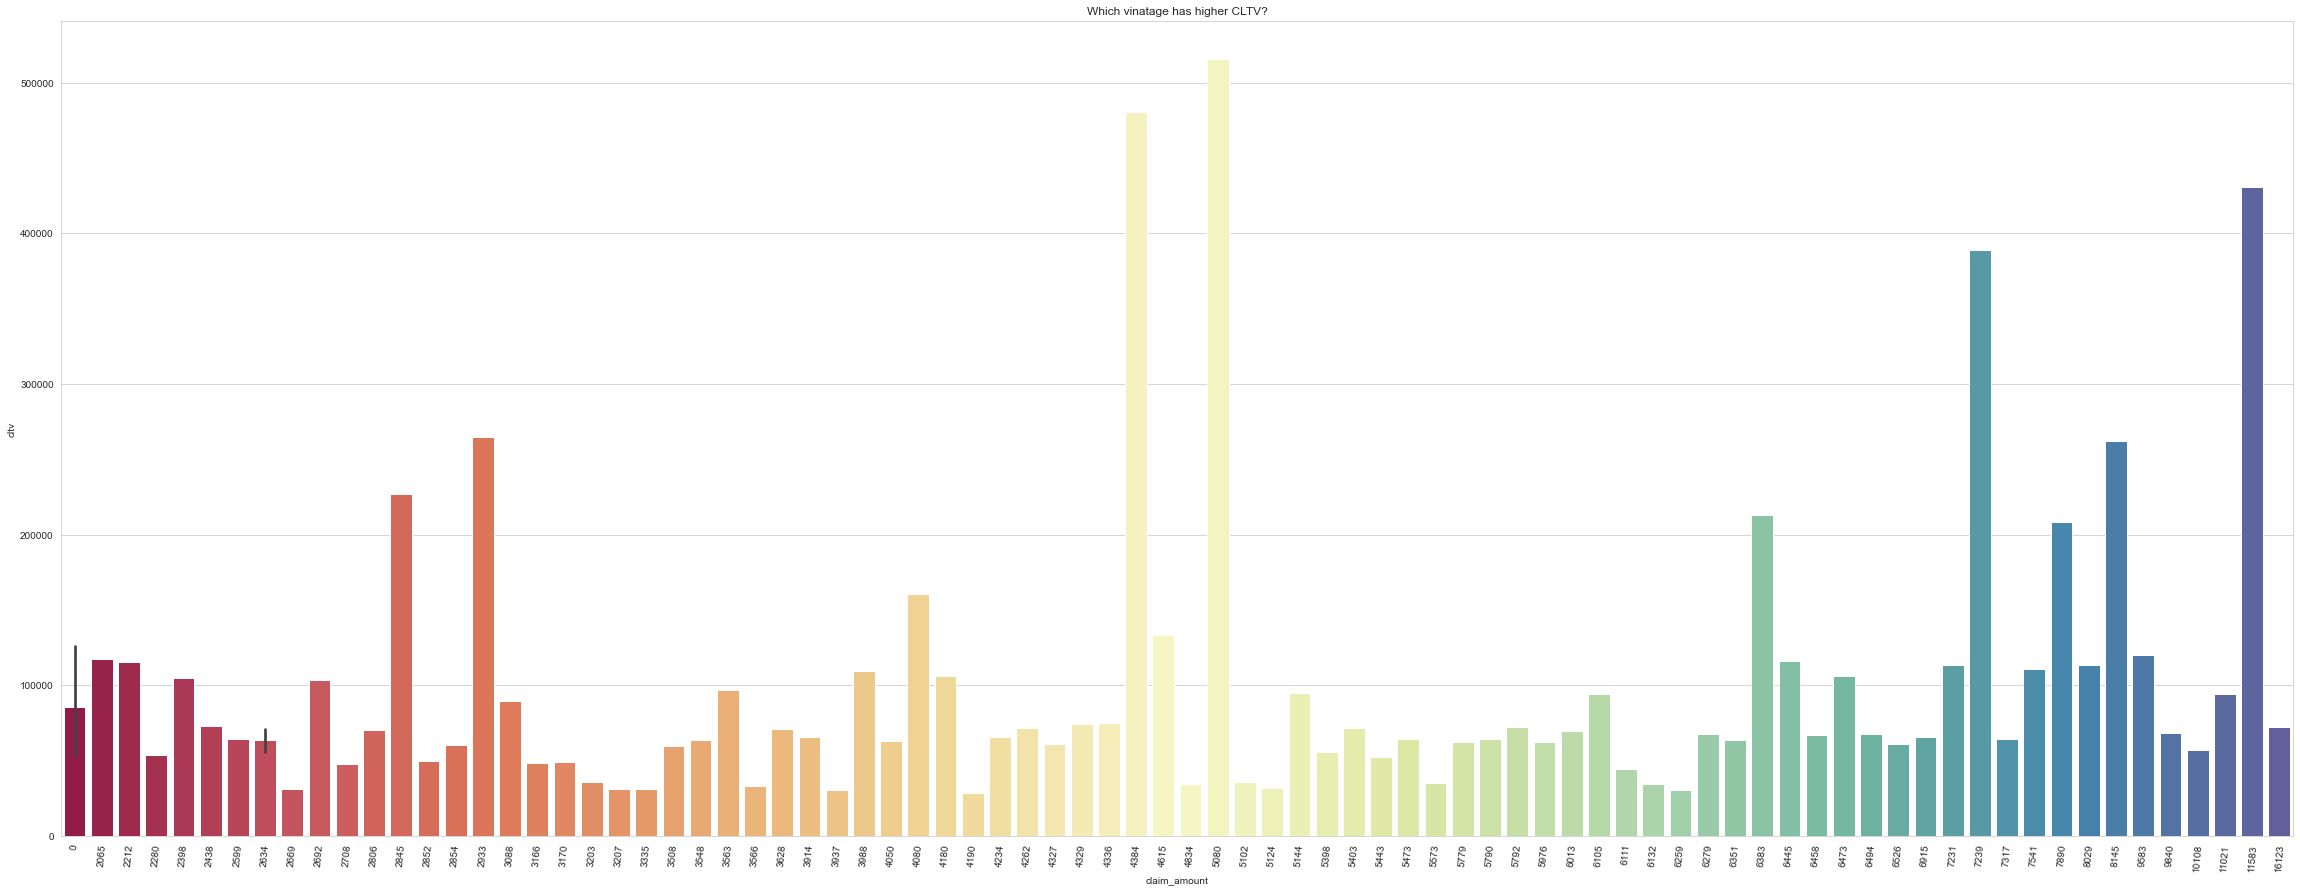

In [25]:
plt.figure(figsize = (40, 15))
plt.xticks(rotation = 85)
plt.ticklabel_format(style = 'plain')
df.sort_values("cltv", axis = 0, ascending = False)
sns.barplot(x = df["claim_amount"][0:100], y = df["cltv"][0:100], palette = "Spectral").set(title='Which vinatage has higher CLTV?');

In [26]:
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


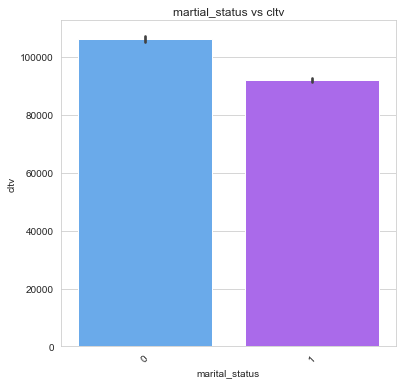

In [27]:
plt.figure(figsize = (6, 6))
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'Plain')
df.sort_values("cltv", axis = 0, ascending = True)
sns.barplot(x=df["marital_status"],y=df["cltv"],palette="cool").set(title='martial_status vs cltv');

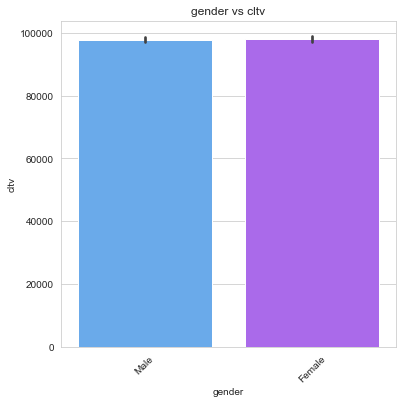

In [28]:
plt.figure(figsize = (6, 6))
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'Plain')
df.sort_values("cltv", axis = 0, ascending = True)
sns.barplot(x=df["gender"],y=df["cltv"],palette="cool").set(title='gender vs cltv');

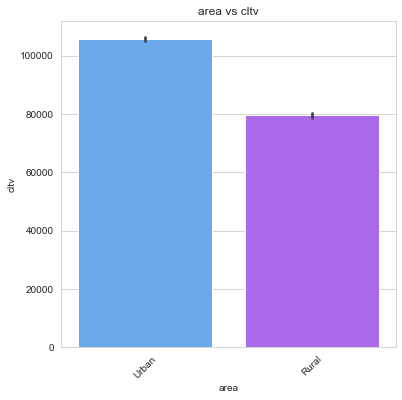

In [29]:
plt.figure(figsize = (6, 6))
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'Plain')
df.sort_values("cltv", axis = 0, ascending = True)
sns.barplot(x=df["area"],y=df["cltv"],palette="cool").set(title='area vs cltv');

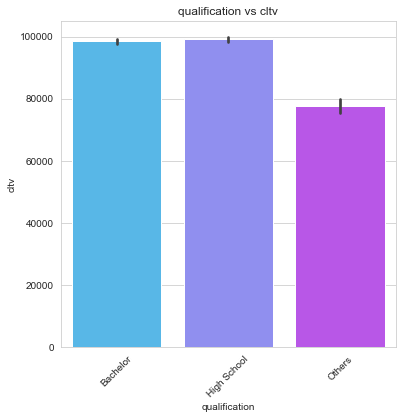

In [30]:
plt.figure(figsize = (6, 6))
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'Plain')
df.sort_values("cltv", axis = 0, ascending = True)
sns.barplot(x=df["qualification"],y=df["cltv"],palette="cool").set(title='qualification vs cltv');

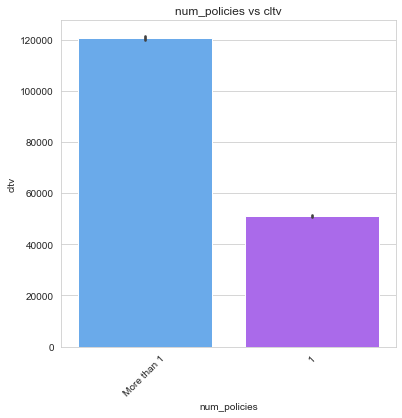

In [31]:
plt.figure(figsize = (6, 6))
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'Plain')
df.sort_values("cltv", axis = 0, ascending = True)
sns.barplot(x=df["num_policies"],y=df["cltv"],palette="cool").set(title='num_policies vs cltv');

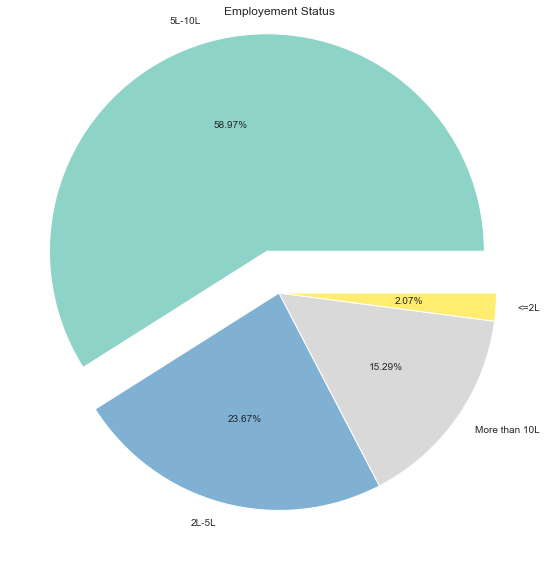

In [32]:
explode=(0.2,0,0,0)
df.sort_values("cltv", axis = 0, ascending = False)
df["income"].value_counts().plot.pie(figsize=(10,10),explode=explode,autopct='%0.2f%%',colormap="Set3",title="Employement Status");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

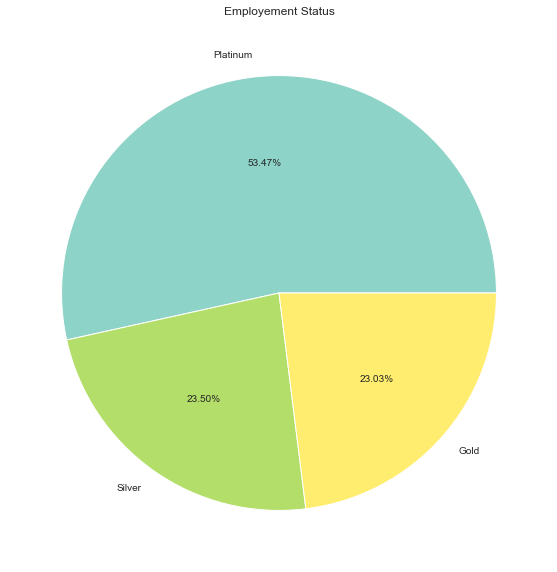

In [33]:
explode=(0.2,0,0,0)
df.sort_values("cltv", axis = 0, ascending = False)
df["type_of_policy"].value_counts().plot.pie(figsize=(10,10),autopct='%0.2f%%',colormap="Set3",title="Employement Status");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

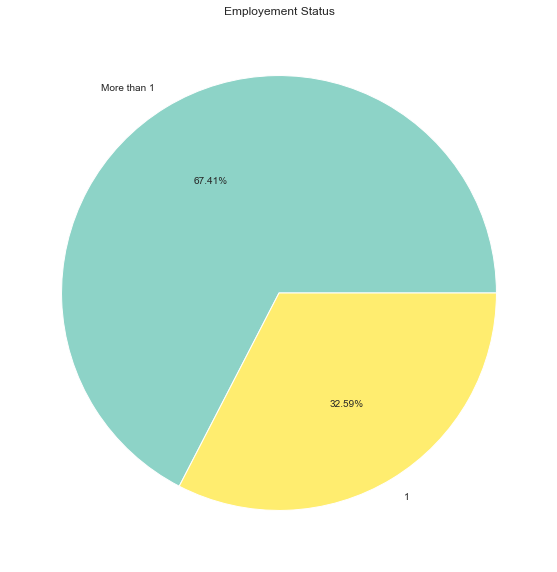

In [34]:
explode=(0.2,0,0,0)
df.sort_values("cltv", axis = 0, ascending = False)
df["num_policies"].value_counts().plot.pie(figsize=(10,10),autopct='%0.2f%%',colormap="Set3",title="Employement Status");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

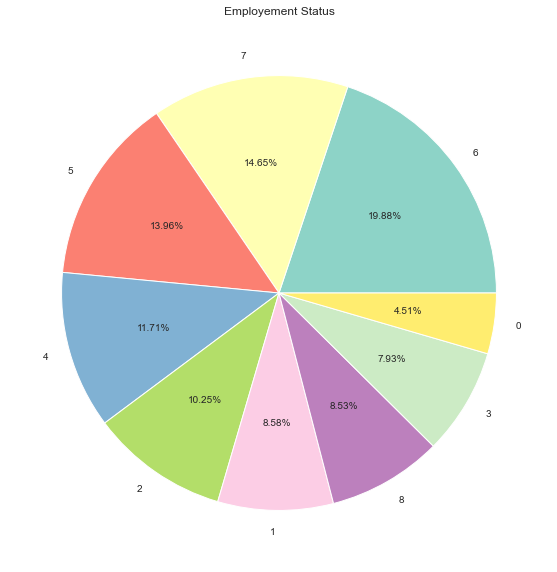

In [35]:
explode=(0.2,0,0,0)
df.sort_values("cltv", axis = 0, ascending = False)
df["vintage"].value_counts().plot.pie(figsize=(10,10),autopct='%0.2f%%',colormap="Set3",title="Employement Status");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

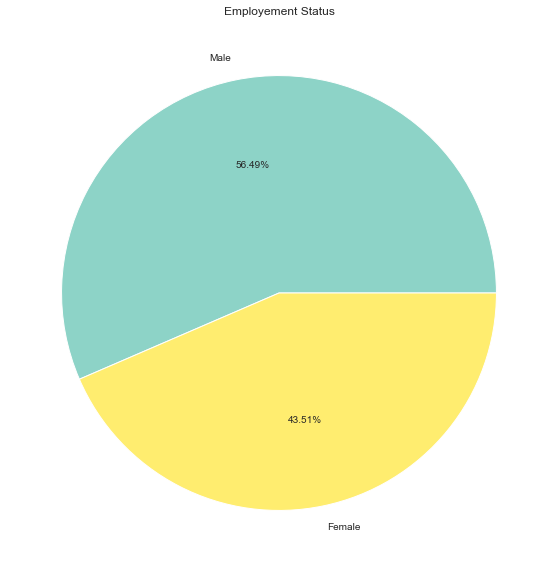

In [36]:
explode=(0.2,0,0,0)
df.sort_values("cltv", axis = 0, ascending = False)
df["gender"].value_counts().plot.pie(figsize=(10,10),autopct='%0.2f%%',colormap="Set3",title="Employement Status");
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

In [37]:
df_n = pd.get_dummies(df)

In [38]:
df_n

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1,1,5,5790,64308,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2,0,8,5080,515400,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3,1,8,2599,64212,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4,0,7,0,97920,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5,1,6,3508,59736,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,0,6,0,95736,0,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
89388,89389,1,0,3897,67596,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
89389,89390,0,4,3363,114120,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
89390,89391,0,8,0,71772,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [39]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df_n['claim_amount'])
print("Outliers from IQR method: ", len(sample_outliers))

Outliers from IQR method:  2258


In [40]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(df_n['claim_amount'], 10)
ninetieth_percentile = np.percentile(df_n['claim_amount'], 90)
# print(tenth_percentile, ninetieth_percentile)
b = np.where(df_n['claim_amount']<tenth_percentile, tenth_percentile, df_n['claim_amount'])
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

New array: [5790. 5080. 2599. ... 3363.    0.    0.]


In [41]:
df_n['claim_amount'] = b
df_n.drop(['id'], axis=1,inplace=True)

<AxesSubplot:xlabel='claim_amount', ylabel='Density'>

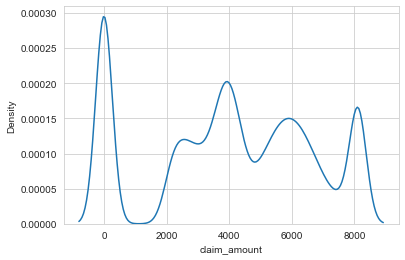

In [42]:
sns.kdeplot(df_n['claim_amount'])

In [43]:
df_n.columns

Index(['marital_status', 'vintage', 'claim_amount', 'cltv', 'gender_Female',
       'gender_Male', 'area_Rural', 'area_Urban', 'qualification_Bachelor',
       'qualification_High School', 'qualification_Others', 'income_2L-5L',
       'income_5L-10L', 'income_<=2L', 'income_More than 10L',
       'num_policies_1', 'num_policies_More than 1', 'policy_A', 'policy_B',
       'policy_C', 'type_of_policy_Gold', 'type_of_policy_Platinum',
       'type_of_policy_Silver'],
      dtype='object')

In [44]:
df_n.rename(columns = {'income_<=2L':'income_less_than_2L'}, inplace = True)
df_n.rename(columns = {'income_2L-5L':'income_between_2L_to_5L'}, inplace = True)
df_n.rename(columns = {'income_5L-10L':'income_between_5L_to_10L'}, inplace = True)

In [45]:
df_n.columns

Index(['marital_status', 'vintage', 'claim_amount', 'cltv', 'gender_Female',
       'gender_Male', 'area_Rural', 'area_Urban', 'qualification_Bachelor',
       'qualification_High School', 'qualification_Others',
       'income_between_2L_to_5L', 'income_between_5L_to_10L',
       'income_less_than_2L', 'income_More than 10L', 'num_policies_1',
       'num_policies_More than 1', 'policy_A', 'policy_B', 'policy_C',
       'type_of_policy_Gold', 'type_of_policy_Platinum',
       'type_of_policy_Silver'],
      dtype='object')

In [46]:
X=df_n.drop(['cltv'], axis=1)
y=df_n['cltv']

In [47]:
X.columns

Index(['marital_status', 'vintage', 'claim_amount', 'gender_Female',
       'gender_Male', 'area_Rural', 'area_Urban', 'qualification_Bachelor',
       'qualification_High School', 'qualification_Others',
       'income_between_2L_to_5L', 'income_between_5L_to_10L',
       'income_less_than_2L', 'income_More than 10L', 'num_policies_1',
       'num_policies_More than 1', 'policy_A', 'policy_B', 'policy_C',
       'type_of_policy_Gold', 'type_of_policy_Platinum',
       'type_of_policy_Silver'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [50]:
lasso = Lasso(normalize=True)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  0.15025664863478128


In [51]:
ridge = Ridge(normalize=True)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  0.13560691480252696


In [52]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  0.031371141123144985


In [53]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  -0.6098084926965786


In [54]:
xg = xg.XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  0.13360153000656094


In [55]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train,y_train)
y_pred = gbm.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  0.15962168727785975


In [56]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  -0.07058961629602156


In [57]:
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  0.027132066769951613


In [58]:
df_test = pd.read_csv("test_koRSKBP.csv")
df_test = pd.get_dummies(df_test)
df_test.rename(columns = {'income_<=2L':'income_less_than_2L'}, inplace = True)
df_test.rename(columns = {'income_2L-5L':'income_between_2L_to_5L'}, inplace = True)
df_test.rename(columns = {'income_5L-10L':'income_between_5L_to_10L'}, inplace = True)
df_test.drop(['id'], axis=1,inplace=True)

In [59]:
df_test.columns

Index(['marital_status', 'vintage', 'claim_amount', 'gender_Female',
       'gender_Male', 'area_Rural', 'area_Urban', 'qualification_Bachelor',
       'qualification_High School', 'qualification_Others',
       'income_between_2L_to_5L', 'income_between_5L_to_10L',
       'income_less_than_2L', 'income_More than 10L', 'num_policies_1',
       'num_policies_More than 1', 'policy_A', 'policy_B', 'policy_C',
       'type_of_policy_Gold', 'type_of_policy_Platinum',
       'type_of_policy_Silver'],
      dtype='object')

In [60]:
df_id = pd.read_csv("test_koRSKBP.csv")

In [61]:
y_actual_pred = gbm.predict(df_test)
df_y_pred = pd.DataFrame(y_actual_pred,columns=['cltv'])
df_lasso = pd.concat([df_id['id'], df_y_pred],axis=1)
df_lasso.to_csv('GBM.csv',index=False)

In [62]:
!pip install lightgbm

In [63]:
from lightgbm import LGBMRegressor

In [64]:
lgbm = LGBMRegressor()
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

r2 socre is  0.1558131281524633


In [65]:
from catboost import CatBoostRegressor
model_CBR = CatBoostRegressor()
model_CBR.fit(X,y)
y_pred = model_CBR.predict(X_test)
score = r2_score(y_test,y_pred)
print('r2 socre is ',score)

Learning rate set to 0.083269
0:	learn: 89510.1534212	total: 155ms	remaining: 2m 34s
1:	learn: 88556.7773792	total: 167ms	remaining: 1m 23s
2:	learn: 87748.7959949	total: 178ms	remaining: 59.1s
3:	learn: 87046.3420204	total: 188ms	remaining: 46.9s
4:	learn: 86457.2721528	total: 198ms	remaining: 39.5s
5:	learn: 85947.8201684	total: 207ms	remaining: 34.3s
6:	learn: 85508.9758641	total: 217ms	remaining: 30.8s
7:	learn: 85153.1384120	total: 228ms	remaining: 28.3s
8:	learn: 84831.6075069	total: 239ms	remaining: 26.3s
9:	learn: 84558.1398387	total: 249ms	remaining: 24.6s
10:	learn: 84323.5289222	total: 258ms	remaining: 23.2s
11:	learn: 84132.8524121	total: 270ms	remaining: 22.2s
12:	learn: 83964.2243819	total: 284ms	remaining: 21.6s
13:	learn: 83820.9006516	total: 300ms	remaining: 21.1s
14:	learn: 83699.6969214	total: 315ms	remaining: 20.7s
15:	learn: 83595.7521214	total: 337ms	remaining: 20.8s
16:	learn: 83509.0059626	total: 352ms	remaining: 20.3s
17:	learn: 83434.1701697	total: 366ms	remai

157:	learn: 82475.4365584	total: 2.54s	remaining: 13.5s
158:	learn: 82473.0096264	total: 2.56s	remaining: 13.5s
159:	learn: 82467.9776168	total: 2.58s	remaining: 13.5s
160:	learn: 82464.0917909	total: 2.59s	remaining: 13.5s
161:	learn: 82461.2042626	total: 2.61s	remaining: 13.5s
162:	learn: 82456.3661091	total: 2.64s	remaining: 13.5s
163:	learn: 82454.5065930	total: 2.66s	remaining: 13.6s
164:	learn: 82451.4862004	total: 2.68s	remaining: 13.5s
165:	learn: 82448.8609196	total: 2.7s	remaining: 13.5s
166:	learn: 82443.6298516	total: 2.71s	remaining: 13.5s
167:	learn: 82440.5153972	total: 2.74s	remaining: 13.6s
168:	learn: 82437.2702002	total: 2.76s	remaining: 13.6s
169:	learn: 82435.1545578	total: 2.77s	remaining: 13.5s
170:	learn: 82430.1777661	total: 2.79s	remaining: 13.5s
171:	learn: 82427.1400778	total: 2.81s	remaining: 13.5s
172:	learn: 82423.5464387	total: 2.84s	remaining: 13.6s
173:	learn: 82420.3686149	total: 2.87s	remaining: 13.6s
174:	learn: 82417.4452341	total: 2.9s	remaining: 

316:	learn: 82028.0562207	total: 5.81s	remaining: 12.5s
317:	learn: 82026.3536386	total: 5.83s	remaining: 12.5s
318:	learn: 82023.2482756	total: 5.85s	remaining: 12.5s
319:	learn: 82019.1564310	total: 5.87s	remaining: 12.5s
320:	learn: 82015.7674037	total: 5.89s	remaining: 12.5s
321:	learn: 82013.6021115	total: 5.9s	remaining: 12.4s
322:	learn: 82011.6062689	total: 5.92s	remaining: 12.4s
323:	learn: 82008.1382481	total: 5.93s	remaining: 12.4s
324:	learn: 82005.2749717	total: 5.95s	remaining: 12.3s
325:	learn: 82002.9272757	total: 5.96s	remaining: 12.3s
326:	learn: 81999.9811240	total: 5.98s	remaining: 12.3s
327:	learn: 81996.3020634	total: 5.99s	remaining: 12.3s
328:	learn: 81992.9300499	total: 6.01s	remaining: 12.3s
329:	learn: 81989.7496070	total: 6.02s	remaining: 12.2s
330:	learn: 81987.8049332	total: 6.04s	remaining: 12.2s
331:	learn: 81985.0221245	total: 6.05s	remaining: 12.2s
332:	learn: 81983.0325251	total: 6.07s	remaining: 12.2s
333:	learn: 81978.9508739	total: 6.08s	remaining:

471:	learn: 81648.4113975	total: 8.38s	remaining: 9.38s
472:	learn: 81645.8652752	total: 8.4s	remaining: 9.36s
473:	learn: 81643.6211977	total: 8.42s	remaining: 9.34s
474:	learn: 81642.1824844	total: 8.44s	remaining: 9.32s
475:	learn: 81639.3020906	total: 8.46s	remaining: 9.31s
476:	learn: 81637.1657035	total: 8.47s	remaining: 9.29s
477:	learn: 81634.9090659	total: 8.49s	remaining: 9.27s
478:	learn: 81632.9549895	total: 8.5s	remaining: 9.25s
479:	learn: 81630.0029172	total: 8.52s	remaining: 9.23s
480:	learn: 81626.8594279	total: 8.53s	remaining: 9.21s
481:	learn: 81624.4612701	total: 8.55s	remaining: 9.19s
482:	learn: 81621.8417675	total: 8.56s	remaining: 9.17s
483:	learn: 81619.6817884	total: 8.58s	remaining: 9.15s
484:	learn: 81617.3741901	total: 8.6s	remaining: 9.13s
485:	learn: 81615.9721093	total: 8.61s	remaining: 9.11s
486:	learn: 81613.4415077	total: 8.63s	remaining: 9.09s
487:	learn: 81610.9736980	total: 8.65s	remaining: 9.07s
488:	learn: 81608.2500690	total: 8.66s	remaining: 9

632:	learn: 81302.1261657	total: 10.6s	remaining: 6.12s
633:	learn: 81299.3476966	total: 10.6s	remaining: 6.1s
634:	learn: 81298.0231987	total: 10.6s	remaining: 6.08s
635:	learn: 81296.2883514	total: 10.6s	remaining: 6.06s
636:	learn: 81294.8295451	total: 10.6s	remaining: 6.04s
637:	learn: 81292.2472080	total: 10.6s	remaining: 6.02s
638:	learn: 81289.9317652	total: 10.6s	remaining: 6s
639:	learn: 81287.9677384	total: 10.6s	remaining: 5.98s
640:	learn: 81285.6031923	total: 10.6s	remaining: 5.96s
641:	learn: 81282.8612702	total: 10.7s	remaining: 5.94s
642:	learn: 81281.4705381	total: 10.7s	remaining: 5.92s
643:	learn: 81279.6050283	total: 10.7s	remaining: 5.9s
644:	learn: 81278.3460889	total: 10.7s	remaining: 5.88s
645:	learn: 81276.4280974	total: 10.7s	remaining: 5.86s
646:	learn: 81274.3804646	total: 10.7s	remaining: 5.84s
647:	learn: 81272.5609119	total: 10.7s	remaining: 5.82s
648:	learn: 81271.1600591	total: 10.7s	remaining: 5.8s
649:	learn: 81268.5692430	total: 10.7s	remaining: 5.78

782:	learn: 80998.6466082	total: 12.3s	remaining: 3.41s
783:	learn: 80997.0999359	total: 12.3s	remaining: 3.39s
784:	learn: 80996.0046520	total: 12.3s	remaining: 3.37s
785:	learn: 80994.9206306	total: 12.3s	remaining: 3.35s
786:	learn: 80993.7112319	total: 12.3s	remaining: 3.34s
787:	learn: 80991.9316604	total: 12.3s	remaining: 3.32s
788:	learn: 80989.9977198	total: 12.4s	remaining: 3.31s
789:	learn: 80988.0334440	total: 12.4s	remaining: 3.29s
790:	learn: 80986.0951508	total: 12.4s	remaining: 3.27s
791:	learn: 80984.4296919	total: 12.4s	remaining: 3.25s
792:	learn: 80982.1309355	total: 12.4s	remaining: 3.24s
793:	learn: 80980.9186752	total: 12.4s	remaining: 3.22s
794:	learn: 80979.0581431	total: 12.4s	remaining: 3.2s
795:	learn: 80977.4828345	total: 12.4s	remaining: 3.19s
796:	learn: 80975.6097332	total: 12.4s	remaining: 3.17s
797:	learn: 80974.2161259	total: 12.5s	remaining: 3.15s
798:	learn: 80972.3741111	total: 12.5s	remaining: 3.14s
799:	learn: 80971.0680106	total: 12.5s	remaining:

937:	learn: 80724.3934446	total: 14.1s	remaining: 930ms
938:	learn: 80722.2236357	total: 14.1s	remaining: 915ms
939:	learn: 80720.7553622	total: 14.1s	remaining: 900ms
940:	learn: 80719.2722437	total: 14.1s	remaining: 884ms
941:	learn: 80715.7213038	total: 14.1s	remaining: 869ms
942:	learn: 80714.0644874	total: 14.1s	remaining: 854ms
943:	learn: 80710.8228145	total: 14.1s	remaining: 839ms
944:	learn: 80708.5622315	total: 14.2s	remaining: 825ms
945:	learn: 80705.5880519	total: 14.2s	remaining: 810ms
946:	learn: 80703.4922752	total: 14.2s	remaining: 795ms
947:	learn: 80702.3408900	total: 14.2s	remaining: 780ms
948:	learn: 80701.2168349	total: 14.2s	remaining: 765ms
949:	learn: 80699.4940859	total: 14.3s	remaining: 750ms
950:	learn: 80696.3288909	total: 14.3s	remaining: 735ms
951:	learn: 80694.4051761	total: 14.3s	remaining: 720ms
952:	learn: 80691.6705909	total: 14.3s	remaining: 705ms
953:	learn: 80689.5142590	total: 14.3s	remaining: 690ms
954:	learn: 80687.7036592	total: 14.3s	remaining